In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
device

device(type='cpu')

### Data

In [13]:
# Load CFashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,), (1.0/255.0))])

trainset = torchvision.datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, num_workers=2, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, num_workers=2, shuffle=False)

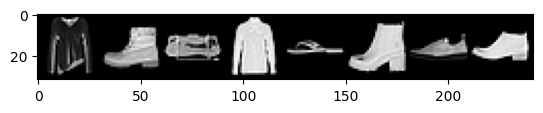

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the images
def imshow(img):
    img = img / 255.0
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    # Plot some images
    imshow(torchvision.utils.make_grid(images[:8])) # Display 8 images from the batch
    break

In [15]:
model = nn.Sequential(
    nn.Flatten(), nn.Linear(784, 10)
)
model = model.to(device)

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [16]:
# Generating a random tensor
input_tensor = torch.rand(5, 28, 28).to(device)

# Feeding the tensor into the model
output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


### Loss, Optimizer, and Evaluation Function

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.00001)

In [22]:
# Function to compute loss and accuracy for test set
def evaluate(model, testloader, criterion):
  model.eval()
  test_loss = 0.0
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in testloader:
      # Move inputs and labels to the device
      images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)
      test_loss += loss

      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  test_loss = test_loss / len(testloader)
  return test_loss, accuracy

In [23]:
test_loss, test_accuracy = evaluate(model, testloader, criterion)
print(f'test_loss: {test_loss}')
print(f'test accuracy: {test_accuracy}')

test_loss: 97.59003448486328
test accuracy: 11.19


### Train

In [25]:
# some parameters
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
max_epoch = 100

In [26]:
# Train
for epoch in range(max_epoch):
  running_loss = 0.0
  running_correct = 0   # To track number of correct predictions
  total = 0             # To track total number of samples

  for i, (inputs, labels) in enumerate(trainloader, 0):
    # Move inputs and labels to device
    inputs, labels = inputs.to(device), labels.to(device)

    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    running_loss += loss.item()

    # Determine class predictions and track accuracy
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    running_correct += (predicted == labels).sum().item()

    # backward pass and optimization
    loss.backward()
    optimizer.step()

  epoch_accuracy = 100 * running_correct / total
  epoch_loss = running_loss / (i+1)
  test_loss, test_accuracy = evaluate(model, testloader, criterion)
  print(f"Epoch [{epoch + 1}/{max_epoch}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%]")

  # Save for plot
  train_losses.append(epoch_loss)
  train_accuracies.append(epoch_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)

Epoch [1/100, Loss: 34.4217, Accuracy: 25.84%, Test Loss: 17.4207, Test Accuracy: 43.35%]
Epoch [2/100, Loss: 13.7469, Accuracy: 50.63%, Test Loss: 11.8836, Test Accuracy: 55.22%]
Epoch [3/100, Loss: 10.7070, Accuracy: 58.28%, Test Loss: 10.2143, Test Accuracy: 59.62%]
Epoch [4/100, Loss: 9.3953, Accuracy: 61.59%, Test Loss: 9.1869, Test Accuracy: 62.08%]
Epoch [5/100, Loss: 8.5745, Accuracy: 63.83%, Test Loss: 8.5194, Test Accuracy: 64.07%]
Epoch [6/100, Loss: 7.9932, Accuracy: 65.47%, Test Loss: 8.0756, Test Accuracy: 65.47%]
Epoch [7/100, Loss: 7.5467, Accuracy: 66.80%, Test Loss: 7.6639, Test Accuracy: 66.65%]
Epoch [8/100, Loss: 7.1866, Accuracy: 67.78%, Test Loss: 7.3537, Test Accuracy: 67.52%]
Epoch [9/100, Loss: 6.9083, Accuracy: 68.73%, Test Loss: 7.1126, Test Accuracy: 68.30%]
Epoch [10/100, Loss: 6.6473, Accuracy: 69.38%, Test Loss: 6.9296, Test Accuracy: 68.71%]
Epoch [11/100, Loss: 6.4394, Accuracy: 69.97%, Test Loss: 6.7041, Test Accuracy: 69.22%]
Epoch [12/100, Loss: 6.2

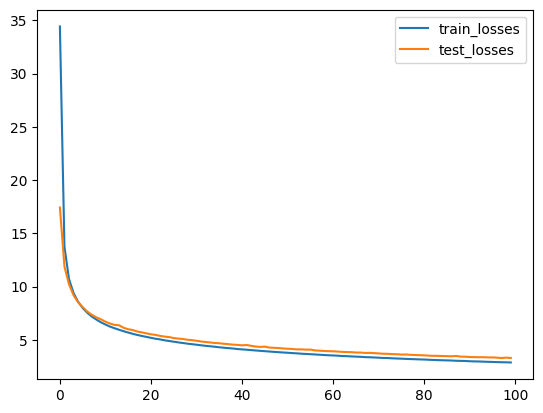

In [27]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

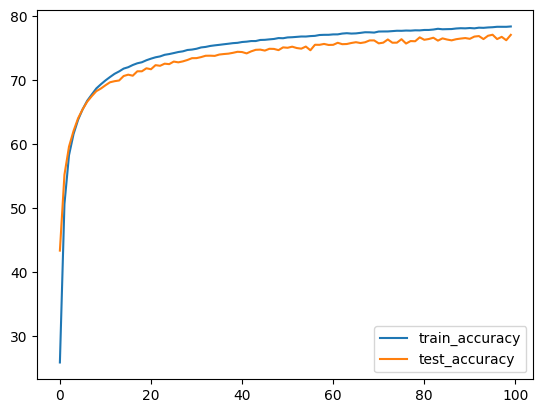

In [28]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()